In [0]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, ), (0.5, ))])
trainset = datasets.MNIST('MNIST_data/', train=True, transform=transform, download=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = datasets.MNIST('MNIST_data/', train=False, transform=transform, download=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

9920512it [00:02, 3918718.91it/s]                             


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 58238.08it/s]                           
0it [00:00, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:01, 976763.45it/s]                             
0it [00:00, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 21712.37it/s]            

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [3]:
dataIter = iter(trainloader)
images, labels = dataIter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


tensor(1)


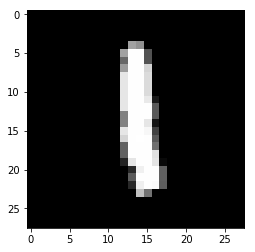

In [4]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')
print(labels[1])

In [0]:
import torch.nn.functional as F
from torch import nn
from torch import optim

In [0]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()

    self.hidden1 = nn.Linear(784, 512)
    self.hidden2 = nn.Linear(512, 64)
    self.output = nn.Linear(64, 10)
    
  def forward(self, x):
    x = F.relu(self.hidden1(x))
    x = F.relu(self.hidden2(x))
    x = F.relu(self.hidden3(x))
    x = F.log_softmax(self.output(x), dim=1)
    return x

In [14]:
criterion = nn.NLLLoss()
images, labels = iter(trainloader).next()
images = images.view(images.shape[0], -1)
prediction = model(images)
loss = criterion(prediction, labels)
optimizer = optim.SGD(model.parameters(), lr=0.003)
print(model)
print(model.state_dict().keys())

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)
odict_keys(['0.weight', '0.bias', '2.weight', '2.bias', '4.weight', '4.bias'])


In [19]:
epochs = 20
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    images = images.view(images.shape[0], -1)
    optimizer.zero_grad()
    prediction = model.forward(images)
    loss = criterion(prediction, labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
  print(f"training loss: {running_loss/len(trainloader)}")
  correct = 0
  total = 0
  with torch.no_grad():
    for images, labels in testloader:
      images = images.view(images.shape[0], -1)
      outputs = model(images)
      _, pred = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (pred == labels).sum().item()
    print(correct/total)

training loss: 0.08043429645489274
0.9678
training loss: 0.07949562491511485
0.9689
training loss: 0.07817533465304863
0.9695
training loss: 0.07730107074543865
0.9689
training loss: 0.07626540256715787
0.9697
training loss: 0.07517319572156173
0.9699
training loss: 0.07429122142017142
0.9701
training loss: 0.07323611584077003
0.9705
training loss: 0.07231497597386206
0.9694
training loss: 0.07162509942010267
0.9706
training loss: 0.07049367687643082
0.9711
training loss: 0.06962802172151965
0.9715
training loss: 0.06866862579211117
0.9713
training loss: 0.06776137336262508
0.9714
training loss: 0.06708638073761326
0.9718
training loss: 0.06621729040037849
0.9712
training loss: 0.06539421652886532
0.9711
training loss: 0.06463066100883585
0.9706
training loss: 0.06363225120232939
0.9723
training loss: 0.06297568600378566
0.9717
